<a href="https://colab.research.google.com/github/vishakha1221/DAV/blob/main/Practical6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("insurance.csv")
x = df["charges"].dropna()

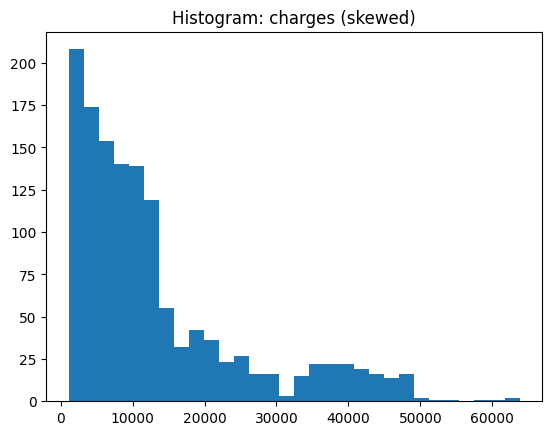

Skewness: 1.5141797118745743


In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.hist(x, bins=30)
plt.title("Histogram: charges (skewed)")
plt.show()

print("Skewness:", stats.skew(x))

In [3]:
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers_iqr = x[(x < lower) | (x > upper)]
print("IQR outliers:", len(outliers_iqr))

IQR outliers: 139


In [4]:
x_iqr_cap = x.clip(lower=lower, upper=upper)

print("Before max:", x.max())
print("After  max:", x_iqr_cap.max())

Before max: 63770.42801
After  max: 34489.350562499996


In [5]:
median = x.median()
mad = np.median(np.abs(x - median))

modified_z = 0.6745*(x - median)/mad
outliers_mad = x[np.abs(modified_z) > 3.5]

print("MAD outliers:", len(outliers_mad))

MAD outliers: 130


In [6]:
x_log = np.log1p(x)  # log(1+x) handles zeros safely
mu = x_log.mean()
sigma = x_log.std(ddof=1)

z_log = (x_log - mu)/sigma
outliers_logz = x[np.abs(z_log) > 3]

print("Outliers after log+z:", len(outliers_logz))

Outliers after log+z: 0


In [7]:
lower_q = x.quantile(0.01)
upper_q = x.quantile(0.99)

x_qcap = x.clip(lower=lower_q, upper=upper_q)
print(lower_q, upper_q)

1252.97273 48537.480726


In [8]:
from sklearn.ensemble import IsolationForest

X = df[["age","bmi","children","charges"]].dropna()

iso = IsolationForest(contamination=0.05, random_state=0)
labels = iso.fit_predict(X)   # -1 outlier, +1 inlier

outlier_rows = X[labels == -1]
print("IsolationForest outliers:", len(outlier_rows))

IsolationForest outliers: 67
